# Praca domowa nr 7

## Wprowadzenie
Tematem pracy domowej była poprawa wykresu z pracy domowej nr 2 (który jest poprawionym wykresem z mediów, ale ta "wykresocepcja" nie idzie głębiej 😃) z wykorzystaniem narzędź do wizualizacji w Pythonie (matplotlib, seaborn). Wybrałem do ponownej poprawy wykres ze swojej pracy domowej [dostępnej tutaj](https://github.com/mini-pw/2021Z-DataVisualizationTechniques/blob/master/homeworks/homework_2/krzyzinski_mateusz/krzyzinski_mateusz_hw2_raport.pdf). 

## Wykres źródłowy
Wizualizacją, którą wybrałem do poprawy w pracy domowej nr 2 był wykres ze strony internetowej Światowego Forum Ekonomicznego w artykule z 13 października zatytułowanym [*Chart of the Day: This is how the $88 trillion global economy is spread around the world*](https://www.weforum.org/agenda/2020/10/global-economy-gdp-growth-covid-19?utm_source=twitter&utm_medium=social_scheduler&utm_term=Geo-economics&utm_content=15/10/2020+08:00).

![original](original_chart.jpg)

## Poprawka z PD2 
Wizualizacja, którą wykonałem w `ggplot2` wyglądała następująco:
![pd2](pd2chart.png) 

## Poprawka w Pythonie

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Dane dostępne w artykule WEF
df = pd.read_csv("gdp_the_world_bank_data.csv", skiprows = 3)[["Country Name", "Country Code", "2019"]]
df.rename(columns = {"Country Name": "Country", "Country Code": "Country Code", "2019": "GDP2019"}, inplace = True)
df = df.set_index("Country Code")

In [3]:
# Dodatkowe dane opisowe - o kontynentach
regions = pd.read_csv("https://pkgstore.datahub.io/JohnSnowLabs/country-and-continent-codes-list/country-and-continent-codes-list-csv_csv/data/b7876b7f496677669644f3d1069d3121/country-and-continent-codes-list-csv_csv.csv")

In [4]:
regions = regions[["Continent_Name", "Three_Letter_Country_Code"]]
regions.rename(columns = {"Continent_Name": "Continent", "Three_Letter_Country_Code": "Country Code"}, inplace = True)
regions = regions.set_index("Country Code")

In [5]:
df = df.join(regions)
df = df.dropna()

In [6]:
df["pct_gdp"] = 100*df["GDP2019"]/np.sum(df["GDP2019"])

In [7]:
df1 = df.groupby("Continent").sum()
df1 = df1.reset_index().sort_values("pct_gdp", ascending = False)

In [8]:
df2 = df.sort_values(by = "pct_gdp", ascending = False).iloc[:10]

In [9]:
sns.set(rc={'figure.figsize':(9,12)}, style = "whitegrid")

In [10]:
colors = {"North America": "#bf0000", "Asia": "#FDDA25", "Europe": "#0a51c4", 
          "South America": "#833177", "Africa": "#6C5D34", "Oceania": "#178f13"}

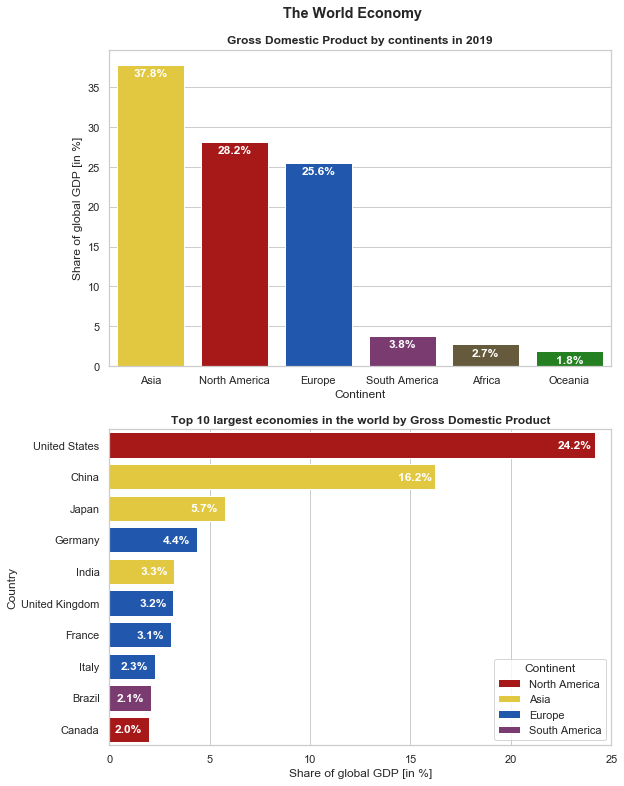

In [11]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle("The World Economy", weight = "bold")
fig.subplots_adjust(top=0.93)

sns.barplot(ax=ax1, data = df1, x = "Continent", y = "pct_gdp", hue = "Continent", dodge = False, palette = colors)
ax1.legend([], [], frameon=False)
ax1.set_title("Gross Domestic Product by continents in 2019", weight = "semibold")
ax1.set_ylabel("Share of global GDP [in %]")

sns.barplot(ax=ax2, data = df2, y = "Country", x = "pct_gdp", hue = "Continent", dodge = False, palette = colors)
ax2.legend(title = "Continent", loc="lower right")
ax2.set_title("Top 10 largest economies in the world by Gross Domestic Product", weight = "semibold")
ax2.set_xlabel("Share of global GDP [in %]")
ax2.set_xlim([0, 25])

for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.1f')+"%", 
                   (p.get_x() + p.get_width()/2, p.get_height()), 
                   ha = "center", va = "center", 
                   xytext = (0, -9),
                   color = "white",
                   weight = 560,
                   textcoords = "offset points")

for p in ax2.patches:
    ax2.annotate(format(p.get_width(), '.1f')+"%", 
                   (p.get_width(), p.get_y()), 
                   ha ="center", va = "center", 
                   xytext = (-20, -13),
                   color = "white",
                   weight = 560,
                   textcoords = "offset points")
plt.show()

## Komentarz 
Głównym zarzutem względem oryginalnej wizualizacji jest to, iż jest ona wariacją na temat wykresu kołowego, w której zostały użyte dodatkowo nieregularne kształty. Powoduje to trudności w odczycie danych, co pokazała ankieta mojej grupy w [PD3+4](https://github.com/mini-pw/2021Z-DataVisualizationTechniques/blob/master/homeworks/homework_3/Krzyzinski_Spytek_Zolkowski_hw3%2B4/Krzyzinski_Spytek_Zolkowski_hw3%2B4_raport_v2.pdf). 

Biorąc pod uwagę dwa podobnej wielkości obszary, na pierwszy rzut oka ciężko jest bowiem określić, który z nich jest większy. Co więcej, z wykresu nie da się w łatwy sposób odczytać kolejności największych światowych gospodarek, ani porównać udziału w światowym PKB poszczególnych regionów świata. Duża ilość uwzględnionych państw wpływa na to, że konieczne było zastosowanie linii pomocniczych.

W pracy domowej nr 2 poprawiłem ten wykres, tworząc barplot przedstawiający wartości PKB dla państw, których gospodarka stanowi ponad 0.5% światowej gospodarki. Dzięki temu można odczytać top państw pod względem PKB wraz z wartością wskaźnika. Wyróżniłem również kolorami państwa z poszczególnych regionów świata. 

**Jednak wizualizacja przedstawiona w tej pracy domowej jest jeszcze lepsza. Dlaczego?**
* Poprzedni barplot był zdecydowanie zbyt długi (chociażby na ekranie mojego laptopa nie mogę go wyświetlić bez przewijania). Tym razem na mniejszym formacie zmieściłem dwa wykresy. Ograniczyłem "ranking" do 10 krajów o najwyższym PKB, gdyż wydaje mi się, że wizualizowanie większej ilości niejako mija się z celem - łatwiejsze może być wówczas odczytanie danych z tabeli.
* Na poprzednich wykresach nie dało się odczytać udziału poszczególnych kontynentów w światowym PKB. Tym razem górny wykres na panelu to umożliwia. Ponadto znalazłem zbiór danych umożliwiający dopasowanie krajów do kontynentów. Jest to zdecydowanie bardziej intuicyjne i łatwiejsze, w szczególności dla osób mniej znających geografię (nie każdy przecież wie, jakie kraje należą do Afryki Subsaharyjskiej). Dzięki temu samych kategorii jest też mniej i nie ma wzbudzającej wątpliwości 'Rest of the World'.
* We wspomnianej już PD3+4 ustaliliśmy, że większość osób lepiej ocenia wykresy słupkowe z etykietami, w związku z tym postanowiłem znów je wykorzystać, ale tym razem ograniczyć się tylko do jednej etykiety dla jednego słupka - procentowej, a także do zmiany osi na oś procentowego udziału w PKB światowym (bez podawania wartości PKB w $, gdyż i tak dla większości ludzi operowanie tak dużymi liczbami jak biliony jest nieintuicyjne).
* Tym razem słupki na obu wykresach panelu są w większej odległości od siebie, co moim zdaniem również wpływa pozytywnie na estetykę i możliwosć odczytu (nie są one tak bardzo ściśnięte, nie przywołują skojarzenia z histogramem etc.).

Podsumowując, wydaje mi się, że takie podejście do wizualizacji tych danych jest znacznie odpowiedniejsze niż poprzednie - pokazujemy zarówno PKB w podziale na kontynenty, jak i dla 10 państw o najwyższej wartości wskaźnika. Dzięki konsekwentnemu użyciu kolorów wykresy ze sobą "współgrają" i tworzą jedną wspólną, kompletną i dopełniającą się wizualizację. 